# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.



In [4]:
pwd

'C:\\Users\\Lenovo\\Desktop\\Semester 10\\Machine Learning\\Take2'

In [5]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import linear_model


# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline



If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [6]:
# Load data
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Semester 10\Machine Learning\Take2\house_prices_data_training_data.csv')

data.drop(['id'], axis=1,inplace=True)
data.drop(['date'], axis=1,inplace=True)


#independant feature x
#x = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
#dependant feature y
#y = data['price']

data.head()
data.shape

#this x and y will later be splitted into train and test and then we are going to train our model based on our train data and i'll be able to test test the accuracy based on our test data 

(17999, 19)

In [7]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
#x_train.shape, y_train.shape
#x_test.shape, y_test.shape

train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])


#knnclassifier = KNeighborsClassifier(n_neighbors=5)
#knnclassifier.fit(x_train,y_train)
#y_pred = knnclassifier.predict(x_test)
#metrics.accuracy_score(y_test,y_pred)


In [8]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2581,695000.0,2,1.00,1140,3990,1.0,0,0,3,7,1140,0,1924,0,98103,47.6554,-122.333,1800,5700
5391,345000.0,3,2.50,1990,20466,1.5,0,0,4,8,1410,580,1987,0,98010,47.3259,-121.896,1660,93393
11248,575000.0,4,1.75,1630,5750,1.0,0,0,3,7,1160,470,1947,0,98116,47.5674,-122.384,1640,5750
15516,724000.0,2,1.00,1560,5000,1.5,0,1,4,7,1560,0,1942,0,98117,47.7006,-122.386,2620,5400
14431,735000.0,3,1.75,2250,11520,1.0,0,1,3,8,2250,0,1956,0,98028,47.7619,-122.268,2730,12445


In [9]:
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9965,485000.0,3,2.25,2900,35273,2.0,0,0,3,9,2900,0,1986,0,98038,47.4013,-122.030,2510,38487
2532,537000.0,3,2.50,1400,4800,1.0,0,0,3,7,1200,200,1921,0,98117,47.6865,-122.379,1440,3840
11381,355000.0,3,0.75,1420,3060,1.0,0,0,4,7,860,560,1923,0,98103,47.6872,-122.346,1350,4000
1703,617000.0,3,1.75,3020,360241,2.0,0,0,3,8,3020,0,1992,0,98092,47.2662,-122.088,1890,209959
11649,615000.0,4,2.50,2120,3720,2.0,0,0,3,8,2120,0,2004,0,98029,47.5526,-121.994,2170,3720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,439000.0,1,1.00,790,2400,1.0,0,0,3,7,790,0,1918,0,98122,47.6178,-122.299,1580,2566
15432,660000.0,4,2.50,2290,9120,2.0,0,0,4,8,2290,0,1977,0,98006,47.5613,-122.128,2290,9120
10924,305000.0,4,2.25,2210,9371,2.0,0,0,4,8,2210,0,1968,0,98032,47.3634,-122.279,2300,11584
2871,302000.0,2,1.00,900,423838,1.0,0,2,5,6,900,0,1925,0,98022,47.2280,-122.088,1810,94960


In [10]:
validate

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15313,340000.0,4,2.50,2380,9362,2.0,0,0,3,8,2380,0,2000,0,98023,47.3148,-122.349,2190,9840
9628,920000.0,4,2.75,2880,5750,1.5,0,0,5,9,1710,1170,1928,0,98116,47.5874,-122.387,1640,5750
8427,420000.0,4,1.75,1320,4978,1.0,0,0,4,7,940,380,1942,0,98126,47.5266,-122.379,1260,4693
2408,1020000.0,3,3.50,2880,11340,1.0,0,0,3,8,1690,1190,1980,2013,98074,47.6113,-122.058,2530,11340
9729,690000.0,3,1.50,1710,17707,1.0,0,0,4,7,1180,530,1947,0,98040,47.5393,-122.216,2590,9508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266,415000.0,3,1.50,1740,9046,1.0,0,0,3,7,1740,0,1956,0,98028,47.7402,-122.255,1830,9513
1065,550000.0,3,1.00,1520,2500,1.5,0,0,3,8,1520,0,1912,0,98109,47.6347,-122.352,1880,3600
122,395000.0,2,1.00,770,6000,1.0,0,0,3,6,770,0,1953,0,98117,47.6999,-122.364,1710,6000
5199,710000.0,3,2.00,1780,9732,1.0,0,0,3,8,1780,0,1967,0,98040,47.5796,-122.229,1900,10200


Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [11]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X -mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [12]:
?np.std

In [13]:
# call featureNormalize on the loaded data
X_norm_train, mu_train, sigma_train = featureNormalize(train)

X_norm_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2581,0.414821,-1.421992,-1.387553,-1.001300,-0.305569,-0.845001,-0.093707,-0.315375,-0.672482,-0.514322,-0.760530,-0.667937,-1.558423,-0.221023,0.469931,0.679295,-0.856584,-0.262786,-0.292840
5391,-0.517569,-0.384138,0.560511,-0.080933,0.120818,0.137679,-0.093707,-0.315375,0.832935,0.330675,-0.430354,0.611357,0.704454,-0.221023,-1.259223,-1.690858,2.300695,-0.469136,3.114751
11248,0.095145,0.653717,-0.413521,-0.470735,-0.260022,-0.845001,-0.093707,-0.315375,-0.672482,-0.514322,-0.736073,0.368733,-0.732293,-0.221023,0.711641,0.046295,-1.225054,-0.498615,-0.290897
15516,0.492077,-1.421992,-1.387553,-0.546530,-0.279431,0.137679,-0.093707,0.942746,0.832935,-0.514322,-0.246922,-0.667937,-0.911887,-0.221023,0.730234,1.004427,-1.239503,0.945834,-0.304497
14431,0.521380,-0.384138,-0.413521,0.200591,-0.110698,-0.845001,-0.093707,0.942746,-0.672482,0.330675,0.596863,-0.667937,-0.409025,-0.221023,-0.924548,1.445369,-0.386966,1.107967,-0.030741


In [14]:
X_norm_test, mu_test, sigma_test = featureNormalize(test)

In [15]:
X_norm_validate, mu_validate, sigma_validate = featureNormalize(validate)

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [16]:
# Add intercept term to X
Train = pd.DataFrame(np.concatenate([np.ones((train.shape[0], 1)), X_norm_train], axis=1))
Validate = pd.DataFrame(np.concatenate([np.ones((validate.shape[0], 1)), X_norm_validate], axis=1))
Test = pd.DataFrame(np.concatenate([np.ones((test.shape[0], 1)), X_norm_test], axis=1))
Train.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.414821,-1.421992,-1.387553,-1.001300,-0.305569,-0.845001,-0.093707,-0.315375,-0.672482,-0.514322,-0.760530,-0.667937,-1.558423,-0.221023,0.469931,0.679295,-0.856584,-0.262786,-0.292840
1,1.0,-0.517569,-0.384138,0.560511,-0.080933,0.120818,0.137679,-0.093707,-0.315375,0.832935,0.330675,-0.430354,0.611357,0.704454,-0.221023,-1.259223,-1.690858,2.300695,-0.469136,3.114751
2,1.0,0.095145,0.653717,-0.413521,-0.470735,-0.260022,-0.845001,-0.093707,-0.315375,-0.672482,-0.514322,-0.736073,0.368733,-0.732293,-0.221023,0.711641,0.046295,-1.225054,-0.498615,-0.290897
3,1.0,0.492077,-1.421992,-1.387553,-0.546530,-0.279431,0.137679,-0.093707,0.942746,0.832935,-0.514322,-0.246922,-0.667937,-0.911887,-0.221023,0.730234,1.004427,-1.239503,0.945834,-0.304497
4,1.0,0.521380,-0.384138,-0.413521,0.200591,-0.110698,-0.845001,-0.093707,0.942746,-0.672482,0.330675,0.596863,-0.667937,-0.409025,-0.221023,-0.924548,1.445369,-0.386966,1.107967,-0.030741


<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [17]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X, theta)
    J= (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J


In [18]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        
        hypothesis=0
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1  Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

In [37]:
############## TRAINING #################
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400
y = Train.iloc[:,1]
x = Train.drop(columns =[1])

J_values = []
theta_of_min = []
# init theta and run gradient descent

for i in range(2,20) :
    
    theta_i = np.zeros(i)
    theta_cov, J_history = gradientDescentMulti(x.iloc[:,0:i], y, theta_i, alpha, num_iters)
    J_values.append(J_history[num_iters-1])
    theta_of_min.append(theta_cov)
    
    
for m in range(0,18):
    min = J_values[0]
    if J_values[m] < min:
        min = J_values[m]
    

print(len(J_values))
print(min)
l = J_values.index(min)
print(theta_of_min[l])
print(l)

18
0.14472841646341508
0     5.633842e-13
2    -7.737195e-02
3     8.304991e-02
4     2.156635e-01
5     1.149178e-02
6    -2.588432e-03
7     1.609826e-01
8     1.110005e-01
9     5.005565e-02
10    2.813038e-01
11    2.072211e-01
12    6.555514e-02
13   -2.137072e-01
14    2.116586e-02
15   -8.751215e-02
16    2.194327e-01
17   -7.671679e-02
18    6.368353e-02
19   -2.952077e-02
Name: 1, dtype: float64
17


In [36]:
################ VALIDATION ##################

y_val = Validate.iloc[:,1]
x_val = Validate.drop(columns =[1])
J_vals = []

for i in range(2,20) :
    
    J= computeCostMulti(x_val.iloc[:,0:i], y_val, theta_of_min[i-2])
    J_vals.append(J)
    
for m in range(0,18):
    min = J_vals[0]
    if J_vals[m] < min:
        min = J_vals[m]


print(J_vals)
print(min)
l = J_vals.index(min)
print(l)

[0.46150463028791755, 0.3698351684742909, 0.26054002602462384, 0.26089848553258344, 0.2610209326822432, 0.2489256960292131, 0.23538190707922468, 0.23238108261083856, 0.21527869662614588, 0.2151667280745348, 0.21506522905543596, 0.18536205770422318, 0.18524579821537432, 0.18508121238216807, 0.16189255800019686, 0.16137612383503172, 0.15973205083290004, 0.15937606952955422]
0.15937606952955422
17


In [41]:
################ TESTING ##################

y_test = Test.iloc[:,1]
x_test = Test.drop(columns =[1])

J_test= computeCostMulti(x_test, y_test, theta_of_min[17])

print(J_test)


0.15918091593687728


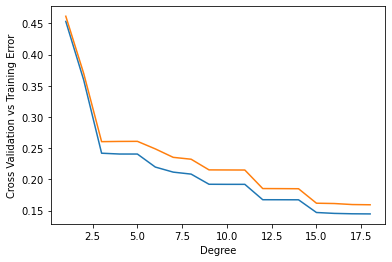

In [45]:
Degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
J_values
J_vals
pyplot.xlabel('Degree')
pyplot.ylabel('Cross Validation vs Training Error')

pyplot.plot(Degrees, J_values)
pyplot.plot(Degrees, J_vals )
pyplot.show()
